In [14]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('./data/data/electric.csv')
df.columns = ['11','Produce','Use']
df.head()

x = tf.placeholder( tf. float32)
y = tf.constant(df['Use'], tf.float32)

w = tf.Variable(tf.random_uniform([1]))
b = tf.Variable(tf.random_uniform([1]))

hx = w*x + b
cost = tf.reduce_mean( tf.square(hx-y))

optimizer = tf.train.GradientDescentOptimizer(0.01)
train = optimizer.minimize(cost)

sess = tf.Session()

init = tf.global_variables_initializer() #############중요!!!!!!!!!!!!!!!!!!(variable값 초기화)

sess.run(init)

In [17]:
hist = [] 

In [22]:
for i in range(10000):
    sess.run(train,{x:df['Produce']})
    c = sess.run(cost,{x:df['Produce']})
    hist.append(c)
    if i%1000 == 0 :
        print(i,sess.run(cost,{x:df['Produce']}))

0 0.025148466
1000 0.025148466
2000 0.025148466
3000 0.025148466
4000 0.025148466
5000 0.025148466
6000 0.025148466
7000 0.025148466
8000 0.025148466
9000 0.025148466


In [13]:
sess.run(hx,{x:[4.0]})

array([2.9020162], dtype=float32)

ValueError: setting an array element with a sequence.

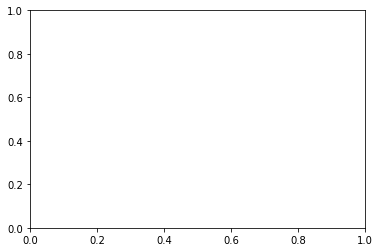

In [23]:
plt.plot(hist)
plt.show()

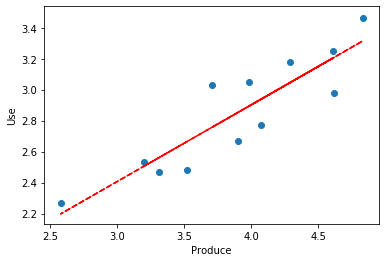

In [15]:
#실측데이터는 scatter로
#예측데이터는 라인그래프로 그림
plt.xlabel('Produce')
plt.ylabel('Use')
plt.scatter(df['Produce'],df['Use'])
plt.plot(df['Produce'],sess.run(hx,{x:df['Produce']}),'r--')
plt.show()

In [ ]:
plt.plot()